Simple model, single run

In [3]:
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

In [5]:
features, labels = sklearn.datasets.load_breast_cancer(return_X_y=True)

In [6]:
def train(X, y, splitter):
    scores = []
    for train_ind, test_ind in splitter.split(X, y):
        pipeline = make_pipeline(RobustScaler(),
                                  RandomForestClassifier(
                                      n_estimators=15,
                                      criterion="entropy",
                                      max_features="auto",
                                      bootstrap=True))

        pipeline.fit(X[train_ind], y[train_ind])
        y_pred = pipeline.predict(X[test_ind])
        scores.append(f1_score(y_pred, y[test_ind]))
        
    return np.array(scores)

In [7]:
scores = train(features, labels, KFold(n_splits=10))
cv_mu, cv_sigma = scores.mean(), scores.std()
print(f"F1 Score {scores.mean():.4f} +/- {scores.std()}")

F1 Score 0.9541 +/- 0.048841430364997024


In [8]:
scores = train(features, labels, StratifiedKFold(n_splits=10))
cv_mu, cv_sigma = scores.mean(), scores.std()
print(f"F1 Score {scores.mean():.4f} +/- {scores.std()}")

F1 Score 0.9709 +/- 0.02936976190068156


Text(0.5, 1.0, 'Average F1 Score 0.971')

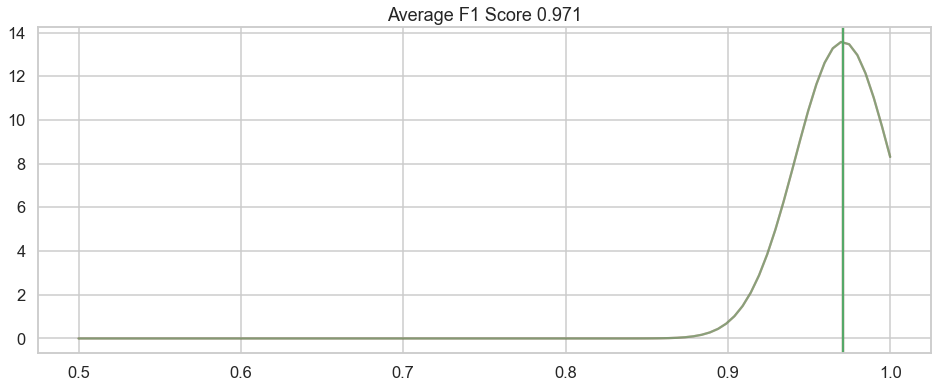

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16,6))

mu, sigma = norm.fit(scores)
x = np.linspace(0.5, 1.0, 100)

ax.plot(x, norm.pdf(x, mu, sigma), 'r-', alpha=0.6)
ax.axvline(mu, color="r")

ax.plot(x, norm.pdf(x, cv_mu, cv_sigma), 'g-', alpha=0.6)
ax.axvline(cv_mu, color="g")

ax.set_title(f"Average F1 Score {mu:.3f}")

exit

So what have we just done?
 - shown how the performance of a model with a single set of hyperparameters affects our score
 - shown that kfold cv can give us a picture of that distribution which is easier to compute that out-of-bootstrap scores and has less leakage
 - so which model to choose? == in this case which data split, which is not what we want, we want to chose a robust estimator so we want to find a model with the best score distribution for a given set of hyperparameters
 - (note: if we want to do hyperparaemter tuning and want our model selection to be unbiaesed weshould do nested Cross Validaiton, but for simpliciy of the code we are sticking with kfold. See: xxxxx_xxxx_xx.ipynb for the nested cross validaiton example)

In [12]:
5*960


4800